In [15]:
import pandas as pd
import src.prepare_dataframe as df_prep
import src.parse_news as PN
import src.get_data as get_data
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cryptocoinnews = df_prep.read_csv_dataframe('./data/cryptocoinnews.csv')
coindesk = df_prep.read_csv_dataframe('./data/coindesk.csv')
news_btc_com = df_prep.read_csv_dataframe('./data/news_bitcoin_com.csv')

### Sentiment Analisys

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def makeSentimentAnalyse(data):
    sid = SentimentIntensityAnalyzer()
    s_analisys_dataframe = pd.DataFrame()

    for i in data.index:
        ss = sid.polarity_scores(data.title[i])
        returnDF = pd.DataFrame(pd.Series(ss,index=ss.keys())).T
        s_analisys_dataframe = s_analisys_dataframe.append(returnDF, ignore_index=True)
    return s_analisys_dataframe

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
SA_cryptocoinnews =makeSentimentAnalyse(cryptocoinnews)
SA_coindesk =makeSentimentAnalyse(coindesk)
SA_news_btc_com =makeSentimentAnalyse(news_btc_com)

In [5]:
dataframe_cryptocoinnews = df_prep.join_SA_and_data(cryptocoinnews, SA_cryptocoinnews)
dataframe_coindesk = df_prep.join_SA_and_data(coindesk, SA_coindesk)
dataframe_news_btc_com = df_prep.join_SA_and_data(news_btc_com, SA_news_btc_com)

### Average Sentiment Every day

In [6]:
cryptocoinnews_AS = df_prep.averageSintimentEveryDay(dataframe_cryptocoinnews)
coindesk_AS = df_prep.averageSintimentEveryDay(dataframe_coindesk)
news_btc_com_AS = df_prep.averageSintimentEveryDay(dataframe_news_btc_com)

In [7]:
cryptocoinnews_AS.head()

,date,neg,neu,pos
0,2017-08-09,0.000,0.7685,0.2315
1,2017-08-08,0.000,1.0000,0.0000
2,2017-08-07,0.247,0.7530,0.0000
3,2017-07-30,0.000,0.7620,0.2380
4,2017-07-24,0.000,0.5930,0.4070


[]

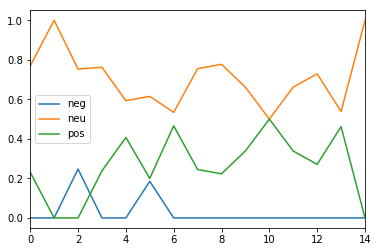

In [19]:
cryptocoinnews_AS.plot()
plt.plot()

### visualise all and compare with CLOSE price

In [22]:
data =  get_data.get_data_frame("USDT_BTC", "poloniex")

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y = scaler.fit_transform(data.close.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [43]:
plt_close = pd.DataFrame(data= y, index=data.date)
plt.close.names = 'close'
cryptocoinnews_AS.index = cryptocoinnews_AS.date

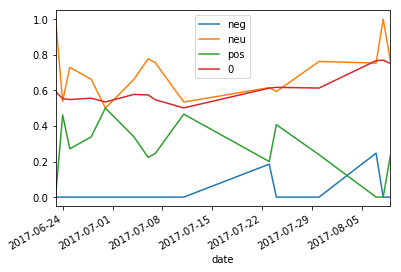

In [44]:
all_df = cryptocoinnews_AS.join(plt_close)
all_df.plot()

In [ ]:
### Logistic regression
from sklearn.linear_model import SGDClassifier, SGDRegressor, LogisticRegression

basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["label"])

testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
basictest = basicvectorizer.transform(testheadlines)
preds1 = basicmodel.predict(basictest)
acc1=accuracy_score(test['Label'], preds1)

In [ ]:
from dateutil import parser
import matplotlib.pyplot as plt
import src.get_data as get_data
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

features = ['neg','neu','pos'] 

x = dataframe_for_analise[features].copy() 
x = x_scaler.fit_transform(x)
NUM_FEATURES = x.shape[1]

y = dataframe_for_analise['close'].copy() 
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

x = pd.DataFrame(x, columns= features)
y = pd.DataFrame(y, columns=['close'])